<a href="https://colab.research.google.com/github/akitim/comptech-winter-school-2022_covid19-prediction/blob/main/n_days_mean_predictor_and_valid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install httpx

In [36]:
import pandas as pd
# import itertools
# from scipy.signal import savgol_filter
# from tqdm.notebook import tqdm
# import json
# from collections import defaultdict
# import pickle
from matplotlib import pyplot as plt
# import pickle
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_absolute_error as mae
# import statsmodels.api as sm
from datetime import date, timedelta, datetime
import pickle
import httpx
import json
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
def get_cases(days):
  data = httpx.get(f"https://storage.yandexcloud.net/covid-19/cases{\
      ('_' + str(days)) if days != 0 else ''}.pickle").content
  return pickle.loads(data)

In [ ]:
d = pd.DataFrame() # удалить

## Вставить в код скрипта для загрузки в MySQL
================================================
================================================

In [17]:
def get_cases(days):
  data = httpx.get(f"https://storage.yandexcloud.net/covid-19/cases{\
      ('_' + str(days)) if days != 0 else ''}.pickle").content
  return pickle.loads(data)
  
def get_predict_mean(country, n_days, need_predict, cases_all, use_filter=True, pred_from=None):

    field_name = ("filtered_" if use_filter else "") + "history"
    threshold = date(year=2021, month=1, day=1)

    just_cases = cases_all[country][field_name]
    if pred_from:
        mean_value = np.mean(just_cases[pred_from - n_days : pred_from].values)
    else:
        mean_value = np.mean(just_cases[- n_days : ].values)

    predict = np.asarray([mean_value for i in range(0, need_predict)])

    return predict

In [19]:
cases = get_cases(0)
d["Mean_7"] = get_predict_mean(country, 7, 30, cases, use_filter=True)

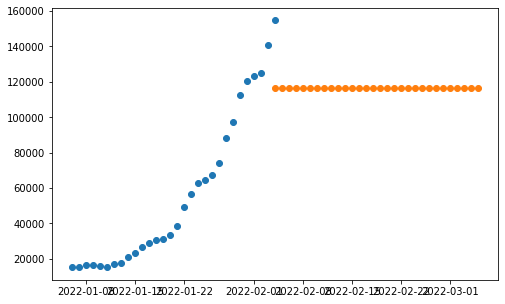

In [52]:
plt.figure(figsize = (8, 5))
plt.scatter(cases['Russia']['history'].index[-30:], cases['Russia']['history'].values[-30:]);

time_ = pd.date_range(cases['Russia']['history'].index[-1], 
                      cases['Russia']['history'].index[-1] + timedelta(days=29))
plt.scatter(time_, get_predict_mean(country, 7, 30, cases, use_filter=True));

In [47]:
time_.size, get_predict_mean(country, 7, 30, cases, use_filter=True).size

(32, 30)

In [29]:
pd.date_range(cases['Russia']['history'].index[-1], \
                      cases['Russia']['history'].index[-1] + timedelta(days=30))

DatetimeIndex(['2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07',
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15',
               '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19',
               '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27',
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06'],
              dtype='datetime64[ns]', freq='D')

================================================
================================================
## Валидация:  MAE + MAPE

In [5]:
cases = get_cases(0)

In [6]:
days = [30, 60] #, 90]
n_days = 2
country = 'Russia'

In [7]:
pure_cases = cases[country]['history']
metrics = {}

for day in days:
    
    mae_ls = []
    mape_ls = []

    for w in range(n_days, pure_cases.size - n_days - day):

        y_true = pure_cases[w : w + day]
        y_pred = get_predict_mean(country=country,
                                  n_days = n_days,
                                  need_predict = day,
                                  cases_all=cases,
                                  use_filter=True,
                                  pred_from=w
        )

        mae_ls += [mae(y_true, y_pred)]
        mape_ls += [mape(y_true, y_pred)]
    
    metrics[f'{day} days'] = {'MAE': np.mean(mae_ls),
                              'MAPE': np.mean(mape_ls)}
metrics

{'30 days': {'MAE': 3117.1705034846727, 'MAPE': 0.19518941940001733},
 '60 days': {'MAE': 4978.604812520736, 'MAPE': 0.3107107747251254}}

Host key verification failed.
